In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [284]:
df = pd.read_csv('ASAP Dataset/Preprocessed_df.csv')

In [285]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,word_len,chars_len,avg_word_length,avg_sentence_length,pos_ratios,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,preprocessed_text
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,386,1875,3.984456,1.0,"{'NNP': 0.031088082901554404, 'JJ': 0.05181347...",16,1,0.310471,0.385613,dear local newspaper think effect computer peo...
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,464,2288,4.030172,1.0,"{'NNP': 0.03879310344827586, ',': 0.0258620689...",20,1,0.274000,0.613167,dear believe using computer benefit u many way...
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,313,1541,4.035144,1.0,"{'NNP': 0.04153354632587859, ',': 0.0287539936...",14,1,0.340393,0.498657,dear people use computer everyone agrees benef...
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,611,3165,4.328969,1.0,"{'NNP': 0.11620294599018004, ',': 0.0212765957...",27,1,0.266828,0.441795,dear local newspaper found many expert say com...
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,517,2569,4.071567,1.0,"{'NNP': 0.017408123791102514, ',': 0.025145067...",30,1,0.199684,0.485814,dear know computer positive effect people comp...


In [286]:
df = df.dropna(axis = 1, how = 'any')

In [287]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,word_len,chars_len,avg_word_length,avg_sentence_length,pos_ratios,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,preprocessed_text
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8,386,1875,3.984456,1.0,"{'NNP': 0.031088082901554404, 'JJ': 0.05181347...",16,1,0.310471,0.385613,dear local newspaper think effect computer peo...
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9,464,2288,4.030172,1.0,"{'NNP': 0.03879310344827586, ',': 0.0258620689...",20,1,0.274000,0.613167,dear believe using computer benefit u many way...
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7,313,1541,4.035144,1.0,"{'NNP': 0.04153354632587859, ',': 0.0287539936...",14,1,0.340393,0.498657,dear people use computer everyone agrees benef...
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10,611,3165,4.328969,1.0,"{'NNP': 0.11620294599018004, ',': 0.0212765957...",27,1,0.266828,0.441795,dear local newspaper found many expert say com...
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8,517,2569,4.071567,1.0,"{'NNP': 0.017408123791102514, ',': 0.025145067...",30,1,0.199684,0.485814,dear know computer positive effect people comp...


In [288]:
drop_columns = ['essay_id', 'pos_ratios', 'essay']
df.drop(drop_columns, axis = 1, inplace = True)

In [289]:
df.head()

,essay_set,rater1_domain1,rater2_domain1,domain1_score,word_len,chars_len,avg_word_length,avg_sentence_length,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,preprocessed_text
0,1,4,4,8,386,1875,3.984456,1.0,16,1,0.310471,0.385613,dear local newspaper think effect computer peo...
1,1,5,4,9,464,2288,4.030172,1.0,20,1,0.274000,0.613167,dear believe using computer benefit u many way...
2,1,4,3,7,313,1541,4.035144,1.0,14,1,0.340393,0.498657,dear people use computer everyone agrees benef...
3,1,5,5,10,611,3165,4.328969,1.0,27,1,0.266828,0.441795,dear local newspaper found many expert say com...
4,1,4,4,8,517,2569,4.071567,1.0,30,1,0.199684,0.485814,dear know computer positive effect people comp...


In [290]:
def choose_classifiers(classifier_name = "logistic_regression"):
    
    if classifier_name == 'logistic_regression':
        return LogisticRegression()
    elif classifier_name == 'random_forest_classifier':
        return RandomForestClassifier()
    elif classifier_name == 'adaboost_classifier':
        return AdaBoostClassifier()
    elif classifier_name == 'k_neighbors_classifier':
        return KNeighborsClassifier()
    elif classifier_name == 'support_vector_classifier':
        return SVC()
    else:
        raise ValueError(f"Classifier {classifier_name} not supported for this problem.")

In [291]:
def calculate_precision(y_true, y_pred, average='macro'):
    precision = precision_score(y_true, y_pred, average=average)
    return precision

def calculate_recall(y_true, y_pred, average='macro'):
    recall = recall_score(y_true, y_pred, average=average)
    return recall

def calculate_f1_score(y_true, y_pred, average='macro'):
    f1 = f1_score(y_true, y_pred, average=average)
    return f1

def calculate_cohen_kappa_score(y_true, y_pred):
    kappa_score = cohen_kappa_score(y_true, y_pred, weights = 'quadratic')
    return kappa_score

def calculate_accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

def print_metrics_function(y_actual, y_predictions):
    
    accuracy = calculate_accuracy(y_actual, y_predictions)
    precision = calculate_precision(y_actual, y_predictions)
    recall = calculate_recall(y_actual, y_predictions)
    f1 = calculate_f1_score(y_actual, y_predictions)
    kappa_score = calculate_cohen_kappa_score(y_actual, y_predictions)

    return accuracy, precision, recall, f1, kappa_score

In [293]:
df.head()

,essay_set,rater1_domain1,rater2_domain1,domain1_score,word_len,chars_len,avg_word_length,avg_sentence_length,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,preprocessed_text
0,1,4,4,8,386,1875,3.984456,1.0,16,1,0.310471,0.385613,dear local newspaper think effect computer peo...
1,1,5,4,9,464,2288,4.030172,1.0,20,1,0.274000,0.613167,dear believe using computer benefit u many way...
2,1,4,3,7,313,1541,4.035144,1.0,14,1,0.340393,0.498657,dear people use computer everyone agrees benef...
3,1,5,5,10,611,3165,4.328969,1.0,27,1,0.266828,0.441795,dear local newspaper found many expert say com...
4,1,4,4,8,517,2569,4.071567,1.0,30,1,0.199684,0.485814,dear know computer positive effect people comp...


In [294]:
df_essay_set1 = df[df.essay_set == 1]
df_essay_set2 = df[df.essay_set == 2]
df_essay_set3 = df[df.essay_set == 3]
df_essay_set4 = df[df.essay_set == 4]
df_essay_set5 = df[df.essay_set == 5]
df_essay_set6 = df[df.essay_set == 6]
df_essay_set7 = df[df.essay_set == 7]
df_essay_set8 = df[df.essay_set == 8]

In [295]:
def dataset_preparation(data, target = 'domain1_score'):
    
    X = data.drop([target], axis = 1)
    y = data[target]
    
    return X, y

In [296]:
X_set1, y_set1 = dataset_preparation(df_essay_set1)
X_set2, y_set2 = dataset_preparation(df_essay_set2)
X_set3, y_set3 = dataset_preparation(df_essay_set3)
X_set4, y_set4 = dataset_preparation(df_essay_set4)
X_set5, y_set5 = dataset_preparation(df_essay_set5)
X_set6, y_set6 = dataset_preparation(df_essay_set6)
X_set7, y_set7 = dataset_preparation(df_essay_set7)
X_set8, y_set8 = dataset_preparation(df_essay_set8)

In [297]:
X_train_set1, X_test_set1, y_train_set1, y_test_set1 = train_test_split(X_set1, y_set1, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set2, X_test_set2, y_train_set2, y_test_set2 = train_test_split(X_set2, y_set2, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set3, X_test_set3, y_train_set3, y_test_set3 = train_test_split(X_set3, y_set3, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set4, X_test_set4, y_train_set4, y_test_set4 = train_test_split(X_set4, y_set4, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set5, X_test_set5, y_train_set5, y_test_set5 = train_test_split(X_set5, y_set5, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set6, X_test_set6, y_train_set6, y_test_set6 = train_test_split(X_set6, y_set6, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set7, X_test_set7, y_train_set7, y_test_set7 = train_test_split(X_set7, y_set7, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set8, X_test_set8, y_train_set8, y_test_set8 = train_test_split(X_set8, y_set8, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)


In [298]:
def print_shapes(X_train, X_test, y_train, y_test, 
                 set_value = "Essay Set-1"):
    
    print(f"------------------------{set_value}------------------------")
    print("The shape of input train data: {}".format(X_train.shape))
    print("The shape of input test data: {}".format(X_test.shape))
    print("The shape of output train data: {}".format(y_train.shape))
    print("The shape of output test data: {}".format(y_test.shape))
    print("\n")

In [299]:
print_shapes(X_train_set1, X_test_set1, y_train_set1, y_test_set1)
print_shapes(X_train_set2, X_test_set2, y_train_set2, y_test_set2, set_value = "Essay Set-2")
print_shapes(X_train_set3, X_test_set3, y_train_set3, y_test_set3, set_value = "Essay Set-3")
print_shapes(X_train_set4, X_test_set4, y_train_set4, y_test_set4, set_value = "Essay Set-4")
print_shapes(X_train_set5, X_test_set5, y_train_set5, y_test_set5, set_value = "Essay Set-5")
print_shapes(X_train_set6, X_test_set6, y_train_set6, y_test_set6, set_value = "Essay Set-6")
print_shapes(X_train_set7, X_test_set7, y_train_set7, y_test_set7, set_value = "Essay Set-7")
print_shapes(X_train_set8, X_test_set8, y_train_set8, y_test_set8, set_value = "Essay Set-8")

------------------------Essay Set-1------------------------
The shape of input train data: (1426, 12)
The shape of input test data: (357, 12)
The shape of output train data: (1426,)
The shape of output test data: (357,)


------------------------Essay Set-2------------------------
The shape of input train data: (1440, 12)
The shape of input test data: (360, 12)
The shape of output train data: (1440,)
The shape of output test data: (360,)


------------------------Essay Set-3------------------------
The shape of input train data: (1380, 12)
The shape of input test data: (346, 12)
The shape of output train data: (1380,)
The shape of output test data: (346,)


------------------------Essay Set-4------------------------
The shape of input train data: (1416, 12)
The shape of input test data: (354, 12)
The shape of output train data: (1416,)
The shape of output test data: (354,)


------------------------Essay Set-5------------------------
The shape of input train data: (1444, 12)
The shape 

In [300]:
X_train_set1['preprocessed_text'].iloc[0]

'dear local people using computer year good health thinking power teen internet need info lot great book need communication phone need go outside exercise computer another reason america becoming obese first teen harmful stuff internet others people invented facebook myspace almost every teen america facebook know there cyberbullying people humiliated others internet know person talking heshe say s heshe teen give away much info gone missing action internet powerful weapon teen handle kind power next although computer convient device true something called book cant believe everything said computer get need book people lived middle age without computer book grown lazy thing get look book finaly communication seek simple text call go trouble turning opening page chat online become lazy device s need home sure good thing dont forget bad one seems like computer another reason america growing obese need get walk hang friend sport adicted computer s like powerful drug conclude think computer

In [301]:
X_train_set1['preprocessed_text'].iloc[1]

'dear newspaper believe computer positive affect society believe computer positive affect help u learn faraway place help u communicate friend family world computer help entertain people computer positive affect society learn faraway place history learn landscape learning thing lot thing plan vacation information help school report also information help learn heiratage culture also computer positive effect beneficial society help communicate friend family world communicate anyone know nowadays everyone us computer main form communication study showed people world computer communication tool lastly computer beneficial society entertain u computer many thing never get bored play game surf web watch video network youtube computer ll never bored computer beneficial positive affect society computer help u learn faraway place let u communicate friend family globe lastly computer entertain u thats computer beneficial society'

### Bag-of-Words Representation + Scaling

In [305]:
def feature_engineering(train_data, test_data, column = 'preprocessed_text'):
    
    X_train_corpus = train_data[column]
    X_test_corpus = test_data[column]
    vectorizer = CountVectorizer()
    X_train_bow = vectorizer.fit_transform(X_train_corpus)
    X_test_bow = vectorizer.transform(X_test_corpus)
    X_train_bow = pd.DataFrame(X_train_bow.toarray(), columns = vectorizer.get_feature_names())
    X_test_bow = pd.DataFrame(X_test_bow.toarray(), columns = vectorizer.get_feature_names())
    X_train_features = train_data.drop([column, 'rater1_domain1', 'rater2_domain1'], axis = 1)
    X_test_features = test_data.drop([column, 'rater1_domain1', 'rater2_domain1'], axis = 1)
    X_train_features.reset_index(drop = True, inplace = True)
    X_test_features.reset_index(drop = True, inplace = True)
    X_train_final = pd.concat([X_train_bow, X_train_features], axis = 1)
    X_test_final = pd.concat([X_test_bow, X_test_features], axis = 1)
    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_final)
    X_test_final = scaler.transform(X_test_final)
    
    return X_train_final, X_test_final

In [306]:
X_train_final, X_test_final = feature_engineering(X_train_set1, X_test_set1)

### Models with Metrics (Essay Set-1)

In [307]:
print("-----------------------Logistic Regression-----------------------")
model = choose_classifiers("logistic_regression")
model.fit(X_train_final, y_train_set1)
y_predictions = model.predict(X_test_final)
accuracy_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_logistic_reg, kappa_score_logistic_reg = print_metrics_function(y_test_set1, y_predictions)

print("\n")
print("-----------------------Random Forest Classifier-----------------------")
model = choose_classifiers("random_forest_classifier")
model.fit(X_train_final, y_train_set1)
y_predictions = model.predict(X_test_final)
accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest, kappa_score_random_forest = print_metrics_function(y_test_set1, y_predictions)

print("\n")
print("-----------------------Adaboost Classifier-----------------------")
model = choose_classifiers("adaboost_classifier")
model.fit(X_train_final, y_train_set1)
y_predictions = model.predict(X_test_final)
accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost, kappa_score_adaboost = print_metrics_function(y_test_set1, y_predictions)

print("\n")
print("-----------------------K Neibhors Classifier-----------------------")
model = choose_classifiers("k_neighbors_classifier")
model.fit(X_train_final, y_train_set1)
y_predictions = model.predict(X_test_final)
accuracy_k_neighbors, precision_k_neighbors, recall_k_neighbors, f1_k_neighbors, kappa_score_k_neighbors = print_metrics_function(y_test_set1, y_predictions)

print("\n")
print("-----------------------Support Vector Classifier-----------------------")
model = choose_classifiers("support_vector_classifier")
model.fit(X_train_final, y_train_set1)
y_predictions = model.predict(X_test_final)
accuracy_svc, precision_svc, recall_svc, f1_svc, kappa_score_svc = print_metrics_function(y_test_set1, y_predictions)


-----------------------Logistic Regression-----------------------
Accuracy: 0.4257703081232493
Precision: 0.19850571014364116
Recall: 0.2491261258902388
F1-Score: 0.16405641847095628
Cohen Kappa Score: 0.5673455432056553


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.4173669467787115
Precision: 0.1713476630168431
Recall: 0.23174132319293608
F1-Score: 0.16227415910298032
Cohen Kappa Score: 0.5542721442303031


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.46218487394957986
Precision: 0.18874293785310733
Recall: 0.2134375
F1-Score: 0.18168804941791397
Cohen Kappa Score: 0.5567525128495394


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.0056022408963585435
Precision: 0.0005602240896358543
Recall: 0.1
F1-Score: 0.0011142061281337048
Cohen Kappa Score: 0.0


-----------------------Support Vector Classifier-----------------------
Accuracy: 0.36694677871148457
Precision: 0.05298219584569733

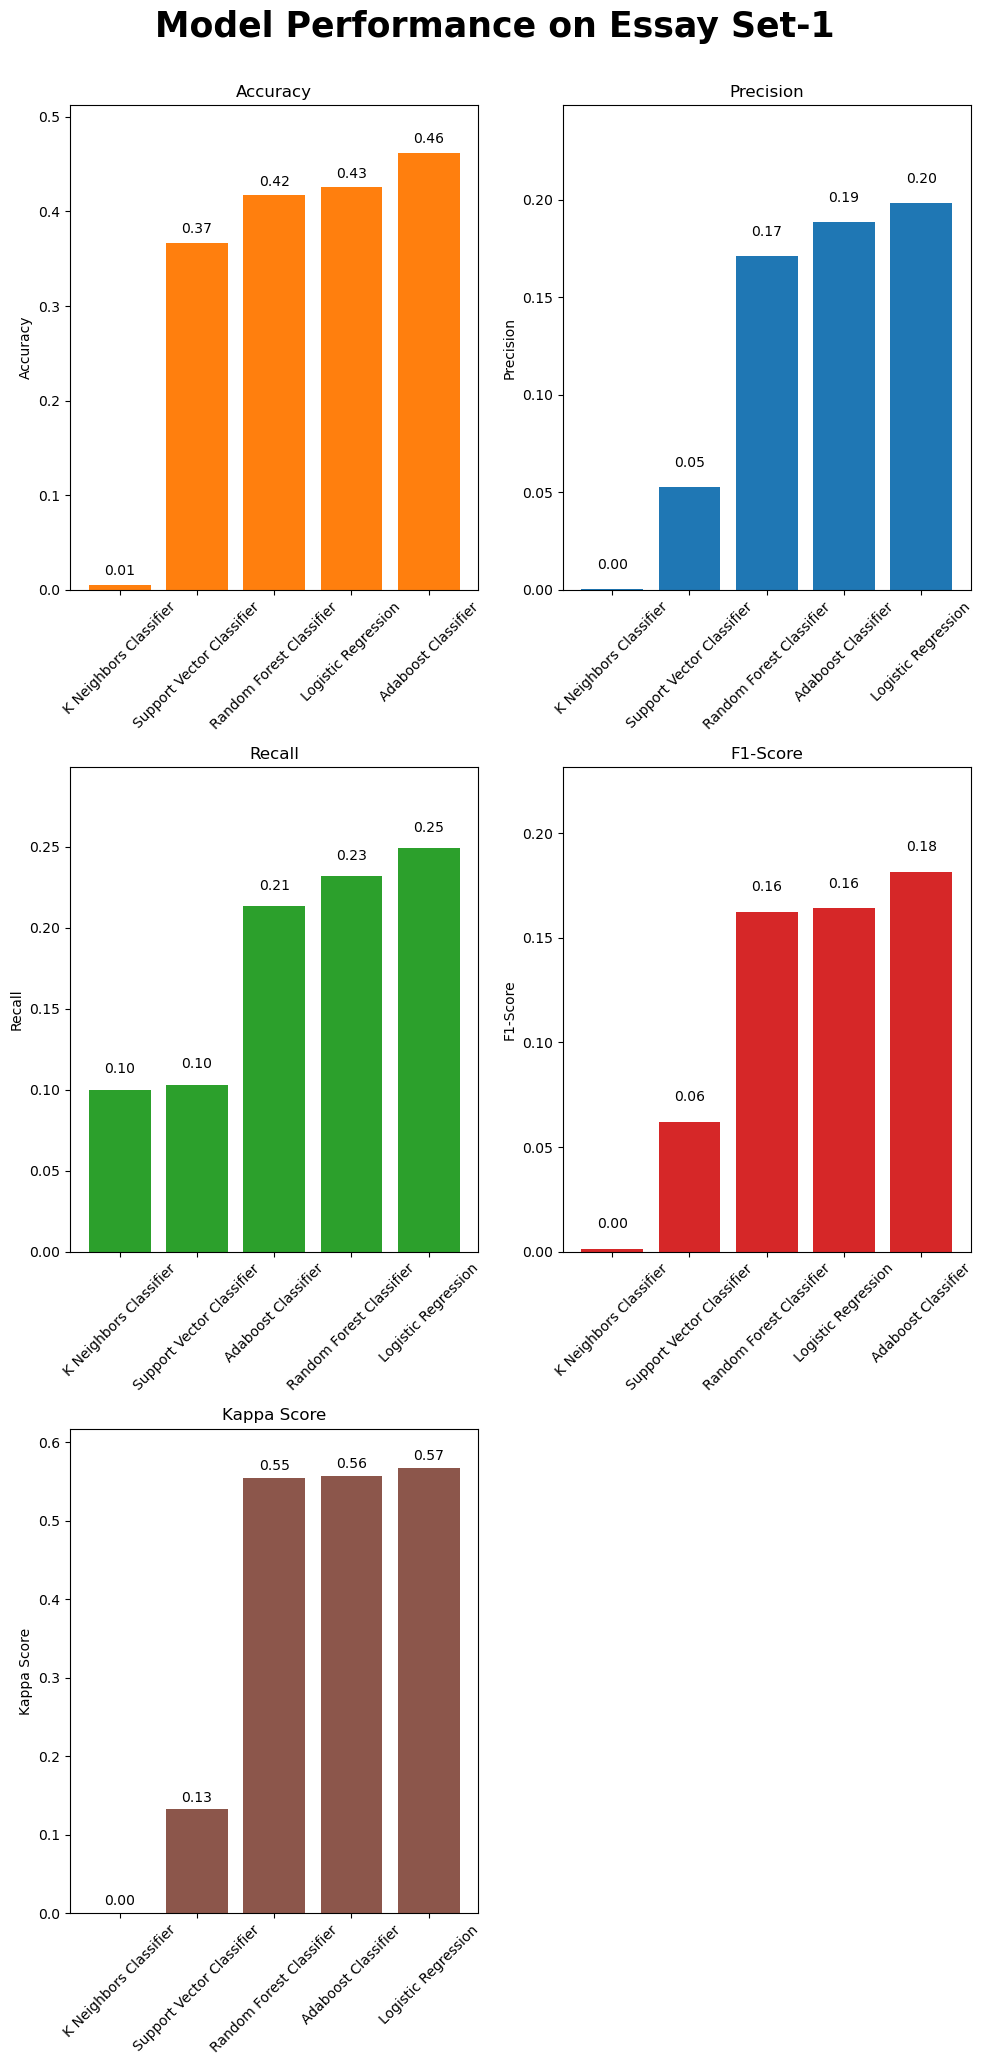

In [308]:
# Define the classifier names
classifier_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier",
                    "K Neighbors Classifier", "Support Vector Classifier"]

# Define the metric names
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

# Define the metric values for each classifier
accuracy_values = [accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc]
precision_values = [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc]
recall_values = [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc]
f1_values = [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc]
kappa_score_values = [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                      kappa_score_k_neighbors, kappa_score_svc]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#8c564b"]

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Plot each metric for all classifiers
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding classifier names
    if metric_name == "Accuracy":
        metric_values = accuracy_values
    elif metric_name == "Precision":
        metric_values = precision_values
    elif metric_name == "Recall":
        metric_values = recall_values
    elif metric_name == "F1-Score":
        metric_values = f1_values
    elif metric_name == "Kappa Score":
        metric_values = kappa_score_values
    sorted_indices = np.argsort(metric_values)
    sorted_values = [metric_values[j] for j in sorted_indices]
    sorted_labels = [classifier_names[j] for j in sorted_indices]

    # Get the subplot corresponding to the current metric
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Create a bar chart for the metric
    ax.bar(sorted_labels, sorted_values, color=colors[i])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, max(sorted_values) + 0.05])
    ax.tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for x, y in zip(sorted_labels, sorted_values):
        ax.text(x, y + 0.01, '{:.2f}'.format(y), ha='center', fontsize=10)

# Hide the last axis
axes[2, 1].axis('off')

# Adjust the spacing between subplots and display the plot
plt.tight_layout()

plt.suptitle("Model Performance on Essay Set-1", fontweight='bold', fontsize=25, y=1.03)
plt.show()


In [309]:
# Define the metric names and their corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]
metrics_list = [[accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc],
               [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc],
               [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc],
               [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc],
               [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                kappa_score_k_neighbors, kappa_score_svc]]

# Define the ML model names
model_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
               "K Neighbors Classifier", "Support Vector Classifier"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())


+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|    Logistic Regression    |  0.426   |   0.199   | 0.249  |  0.164   |    0.567    |
|  Random Forest Classifier |  0.417   |   0.171   | 0.232  |  0.162   |    0.554    |
|    Adaboost Classifier    |  0.462   |   0.189   | 0.213  |  0.182   |    0.557    |
|   K Neighbors Classifier  |  0.006   |   0.001   | 0.100  |  0.001   |    0.000    |
| Support Vector Classifier |  0.367   |   0.053   | 0.103  |  0.062   |    0.132    |
+---------------------------+----------+-----------+--------+----------+-------------+


### Models with Metrics (Essay Set-2)

In [310]:
X_train_final, X_test_final = feature_engineering(X_train_set2, X_test_set2)

In [311]:
print("-----------------------Logistic Regression-----------------------")
model = choose_classifiers("logistic_regression")
model.fit(X_train_final, y_train_set2)
y_predictions = model.predict(X_test_final)
accuracy_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_logistic_reg, kappa_score_logistic_reg = print_metrics_function(y_test_set2, y_predictions)

print("\n")
print("-----------------------Random Forest Classifier-----------------------")
model = choose_classifiers("random_forest_classifier")
model.fit(X_train_final, y_train_set2)
y_predictions = model.predict(X_test_final)
accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest, kappa_score_random_forest = print_metrics_function(y_test_set2, y_predictions)

print("\n")
print("-----------------------Adaboost Classifier-----------------------")
model = choose_classifiers("adaboost_classifier")
model.fit(X_train_final, y_train_set2)
y_predictions = model.predict(X_test_final)
accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost, kappa_score_adaboost = print_metrics_function(y_test_set2, y_predictions)

print("\n")
print("-----------------------K Neibhors Classifier-----------------------")
model = choose_classifiers("k_neighbors_classifier")
model.fit(X_train_final, y_train_set2)
y_predictions = model.predict(X_test_final)
accuracy_k_neighbors, precision_k_neighbors, recall_k_neighbors, f1_k_neighbors, kappa_score_k_neighbors = print_metrics_function(y_test_set2, y_predictions)

print("\n")
print("-----------------------Support Vector Classifier-----------------------")
model = choose_classifiers("support_vector_classifier")
model.fit(X_train_final, y_train_set2)
y_predictions = model.predict(X_test_final)
accuracy_svc, precision_svc, recall_svc, f1_svc, kappa_score_svc = print_metrics_function(y_test_set2, y_predictions)


-----------------------Logistic Regression-----------------------
Accuracy: 0.5722222222222222
Precision: 0.31537471117839216
Recall: 0.3166819493971812
F1-Score: 0.3136410236685253
Cohen Kappa Score: 0.5041079812206573


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6861111111111111
Precision: 0.4365972574911122
Recall: 0.37017999660383766
F1-Score: 0.3780595722298551
Cohen Kappa Score: 0.6295143212951432


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.6444444444444445
Precision: 0.3697863247863248
Recall: 0.42480556970623196
F1-Score: 0.3887656353486612
Cohen Kappa Score: 0.654639175257732


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.08333333333333333
Precision: 0.016666666666666666
Recall: 0.2
F1-Score: 0.03076923076923077
Cohen Kappa Score: 0.0


-----------------------Support Vector Classifier-----------------------
Accuracy: 0.6083333333333333
Precision: 0.25262975898198414
R

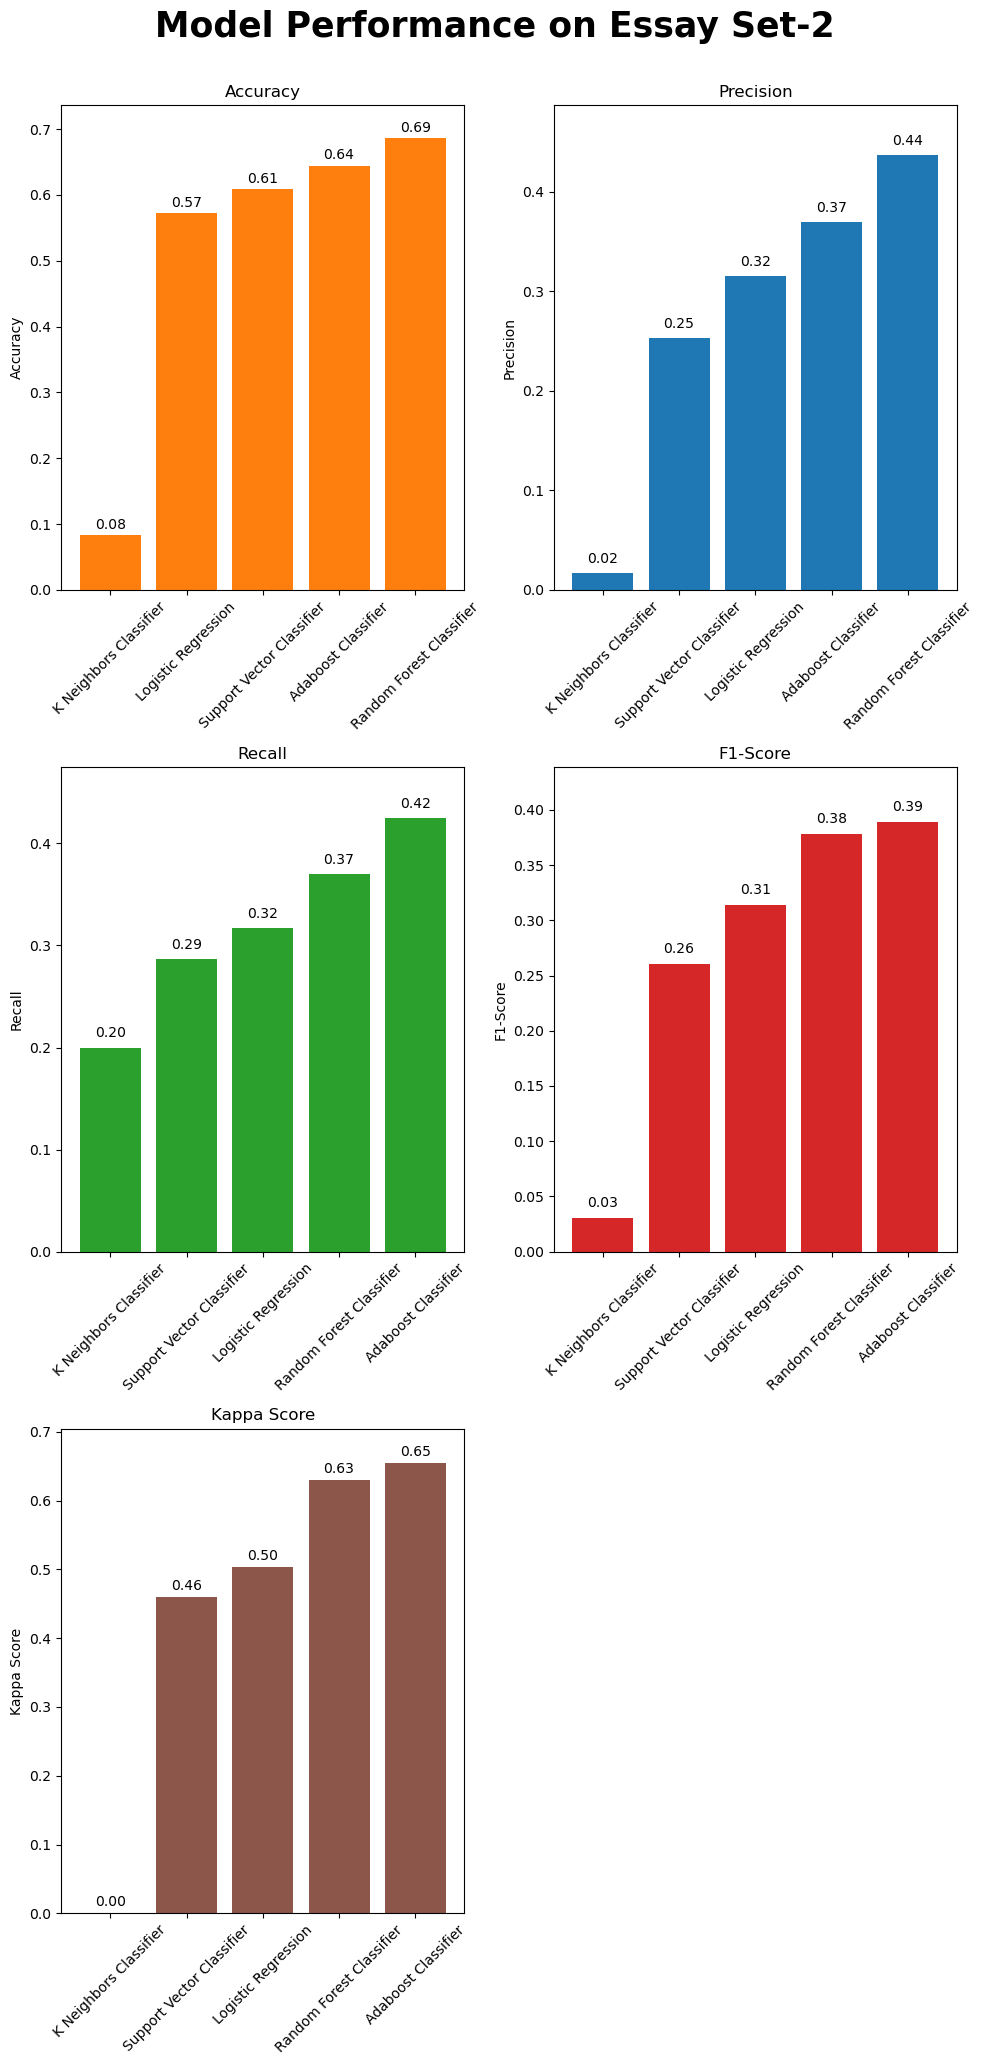

In [312]:
# Define the classifier names
classifier_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier",
                    "K Neighbors Classifier", "Support Vector Classifier"]

# Define the metric names
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

# Define the metric values for each classifier
accuracy_values = [accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc]
precision_values = [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc]
recall_values = [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc]
f1_values = [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc]
kappa_score_values = [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                      kappa_score_k_neighbors, kappa_score_svc]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#8c564b"]

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Plot each metric for all classifiers
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding classifier names
    if metric_name == "Accuracy":
        metric_values = accuracy_values
    elif metric_name == "Precision":
        metric_values = precision_values
    elif metric_name == "Recall":
        metric_values = recall_values
    elif metric_name == "F1-Score":
        metric_values = f1_values
    elif metric_name == "Kappa Score":
        metric_values = kappa_score_values
    sorted_indices = np.argsort(metric_values)
    sorted_values = [metric_values[j] for j in sorted_indices]
    sorted_labels = [classifier_names[j] for j in sorted_indices]

    # Get the subplot corresponding to the current metric
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Create a bar chart for the metric
    ax.bar(sorted_labels, sorted_values, color=colors[i])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, max(sorted_values) + 0.05])
    ax.tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for x, y in zip(sorted_labels, sorted_values):
        ax.text(x, y + 0.01, '{:.2f}'.format(y), ha='center', fontsize=10)

# Hide the last axis
axes[2, 1].axis('off')

# Adjust the spacing between subplots and display the plot
plt.tight_layout()

plt.suptitle("Model Performance on Essay Set-2", fontweight='bold', fontsize=25, y=1.03)
plt.show()


In [313]:
# Define the metric names and their corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]
metrics_list = [[accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc],
               [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc],
               [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc],
               [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc],
               [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                kappa_score_k_neighbors, kappa_score_svc]]

# Define the ML model names
model_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
               "K Neighbors Classifier", "Support Vector Classifier"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())


+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|    Logistic Regression    |  0.572   |   0.315   | 0.317  |  0.314   |    0.504    |
|  Random Forest Classifier |  0.686   |   0.437   | 0.370  |  0.378   |    0.630    |
|    Adaboost Classifier    |  0.644   |   0.370   | 0.425  |  0.389   |    0.655    |
|   K Neighbors Classifier  |  0.083   |   0.017   | 0.200  |  0.031   |    0.000    |
| Support Vector Classifier |  0.608   |   0.253   | 0.286  |  0.260   |    0.459    |
+---------------------------+----------+-----------+--------+----------+-------------+


### Models with Metrics (Essay Set-3)

In [314]:
X_train_final, X_test_final = feature_engineering(X_train_set3, X_test_set3)

In [315]:
print("-----------------------Logistic Regression-----------------------")
model = choose_classifiers("logistic_regression")
model.fit(X_train_final, y_train_set3)
y_predictions = model.predict(X_test_final)
accuracy_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_logistic_reg, kappa_score_logistic_reg = print_metrics_function(y_test_set3, y_predictions)

print("\n")
print("-----------------------Random Forest Classifier-----------------------")
model = choose_classifiers("random_forest_classifier")
model.fit(X_train_final, y_train_set3)
y_predictions = model.predict(X_test_final)
accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest, kappa_score_random_forest = print_metrics_function(y_test_set3, y_predictions)

print("\n")
print("-----------------------Adaboost Classifier-----------------------")
model = choose_classifiers("adaboost_classifier")
model.fit(X_train_final, y_train_set3)
y_predictions = model.predict(X_test_final)
accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost, kappa_score_adaboost = print_metrics_function(y_test_set3, y_predictions)

print("\n")
print("-----------------------K Neibhors Classifier-----------------------")
model = choose_classifiers("k_neighbors_classifier")
model.fit(X_train_final, y_train_set3)
y_predictions = model.predict(X_test_final)
accuracy_k_neighbors, precision_k_neighbors, recall_k_neighbors, f1_k_neighbors, kappa_score_k_neighbors = print_metrics_function(y_test_set3, y_predictions)

print("\n")
print("-----------------------Support Vector Classifier-----------------------")
model = choose_classifiers("support_vector_classifier")
model.fit(X_train_final, y_train_set3)
y_predictions = model.predict(X_test_final)
accuracy_svc, precision_svc, recall_svc, f1_svc, kappa_score_svc = print_metrics_function(y_test_set3, y_predictions)


-----------------------Logistic Regression-----------------------
Accuracy: 0.5491329479768786
Precision: 0.6876115201807698
Recall: 0.43579980520597317
F1-Score: 0.46468216526342637
Cohen Kappa Score: 0.517784036468163


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6358381502890174
Precision: 0.516091404070975
Recall: 0.46694614562068626
F1-Score: 0.4719530684777136
Cohen Kappa Score: 0.6402459238720954


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.546242774566474
Precision: 0.6473954966602026
Recall: 0.41870784447884185
F1-Score: 0.439475418816423
Cohen Kappa Score: 0.49274490639801527


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.3583815028901734
Precision: 0.3717544510385757
Recall: 0.27333055723803756
F1-Score: 0.1665323111345091
Cohen Kappa Score: 0.015526350469025174


-----------------------Support Vector Classifier-----------------------
Accuracy: 0.5549132947976878
Prec

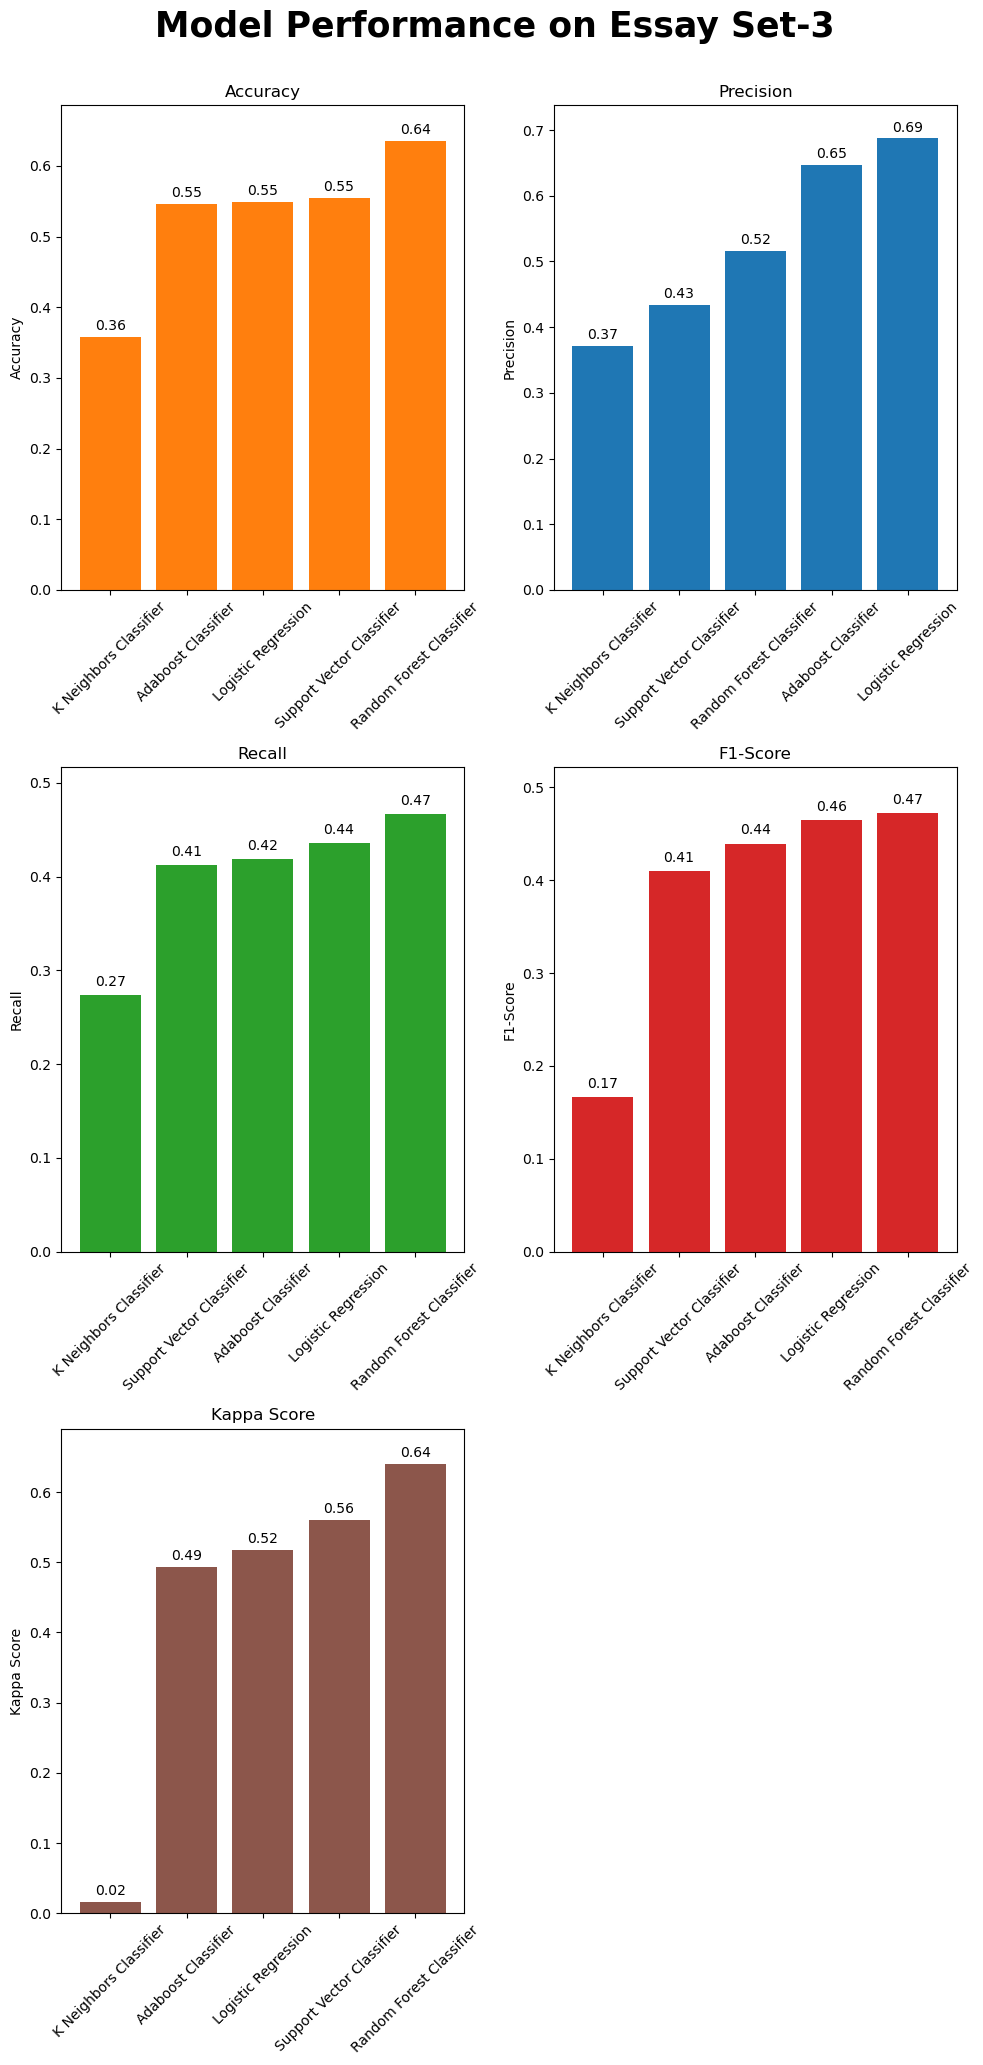

In [316]:
# Define the classifier names
classifier_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier",
                    "K Neighbors Classifier", "Support Vector Classifier"]

# Define the metric names
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

# Define the metric values for each classifier
accuracy_values = [accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc]
precision_values = [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc]
recall_values = [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc]
f1_values = [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc]
kappa_score_values = [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                      kappa_score_k_neighbors, kappa_score_svc]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#8c564b"]

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Plot each metric for all classifiers
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding classifier names
    if metric_name == "Accuracy":
        metric_values = accuracy_values
    elif metric_name == "Precision":
        metric_values = precision_values
    elif metric_name == "Recall":
        metric_values = recall_values
    elif metric_name == "F1-Score":
        metric_values = f1_values
    elif metric_name == "Kappa Score":
        metric_values = kappa_score_values
    sorted_indices = np.argsort(metric_values)
    sorted_values = [metric_values[j] for j in sorted_indices]
    sorted_labels = [classifier_names[j] for j in sorted_indices]

    # Get the subplot corresponding to the current metric
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Create a bar chart for the metric
    ax.bar(sorted_labels, sorted_values, color=colors[i])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, max(sorted_values) + 0.05])
    ax.tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for x, y in zip(sorted_labels, sorted_values):
        ax.text(x, y + 0.01, '{:.2f}'.format(y), ha='center', fontsize=10)

# Hide the last axis
axes[2, 1].axis('off')

# Adjust the spacing between subplots and display the plot
plt.tight_layout()

plt.suptitle("Model Performance on Essay Set-3", fontweight='bold', fontsize=25, y=1.03)
plt.show()

In [317]:
# Define the metric names and their corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]
metrics_list = [[accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc],
               [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc],
               [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc],
               [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc],
               [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                kappa_score_k_neighbors, kappa_score_svc]]

# Define the ML model names
model_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
               "K Neighbors Classifier", "Support Vector Classifier"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())

+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|    Logistic Regression    |  0.549   |   0.688   | 0.436  |  0.465   |    0.518    |
|  Random Forest Classifier |  0.636   |   0.516   | 0.467  |  0.472   |    0.640    |
|    Adaboost Classifier    |  0.546   |   0.647   | 0.419  |  0.439   |    0.493    |
|   K Neighbors Classifier  |  0.358   |   0.372   | 0.273  |  0.167   |    0.016    |
| Support Vector Classifier |  0.555   |   0.434   | 0.412  |  0.410   |    0.560    |
+---------------------------+----------+-----------+--------+----------+-------------+


### Models with Metrics (Essay Set-4)

In [318]:
X_train_final, X_test_final = feature_engineering(X_train_set4, X_test_set4)

In [319]:
print("-----------------------Logistic Regression-----------------------")
model = choose_classifiers("logistic_regression")
model.fit(X_train_final, y_train_set4)
y_predictions = model.predict(X_test_final)
accuracy_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_logistic_reg, kappa_score_logistic_reg = print_metrics_function(y_test_set4, y_predictions)

print("\n")
print("-----------------------Random Forest Classifier-----------------------")
model = choose_classifiers("random_forest_classifier")
model.fit(X_train_final, y_train_set4)
y_predictions = model.predict(X_test_final)
accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest, kappa_score_random_forest = print_metrics_function(y_test_set4, y_predictions)

print("\n")
print("-----------------------Adaboost Classifier-----------------------")
model = choose_classifiers("adaboost_classifier")
model.fit(X_train_final, y_train_set4)
y_predictions = model.predict(X_test_final)
accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost, kappa_score_adaboost = print_metrics_function(y_test_set4, y_predictions)

print("\n")
print("-----------------------K Neibhors Classifier-----------------------")
model = choose_classifiers("k_neighbors_classifier")
model.fit(X_train_final, y_train_set4)
y_predictions = model.predict(X_test_final)
accuracy_k_neighbors, precision_k_neighbors, recall_k_neighbors, f1_k_neighbors, kappa_score_k_neighbors = print_metrics_function(y_test_set4, y_predictions)

print("\n")
print("-----------------------Support Vector Classifier-----------------------")
model = choose_classifiers("support_vector_classifier")
model.fit(X_train_final, y_train_set4)
y_predictions = model.predict(X_test_final)
accuracy_svc, precision_svc, recall_svc, f1_svc, kappa_score_svc = print_metrics_function(y_test_set4, y_predictions)


-----------------------Logistic Regression-----------------------
Accuracy: 0.5056497175141242
Precision: 0.4609872407584114
Recall: 0.4670523212969786
F1-Score: 0.453232531100071
Cohen Kappa Score: 0.5547126391949607


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6271186440677966
Precision: 0.7452608522500996
Recall: 0.5349578615930863
F1-Score: 0.5428083287044051
Cohen Kappa Score: 0.6869546762250625


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.4858757062146893
Precision: 0.4951707874791099
Recall: 0.5024465733235077
F1-Score: 0.49043748285969324
Cohen Kappa Score: 0.6835106161791735


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.22033898305084745
Precision: 0.11850730169266512
Recall: 0.2909090909090909
F1-Score: 0.14119990114698572
Cohen Kappa Score: 0.0960623999223641


-----------------------Support Vector Classifier-----------------------
Accuracy: 0.5338983050847458
Preci

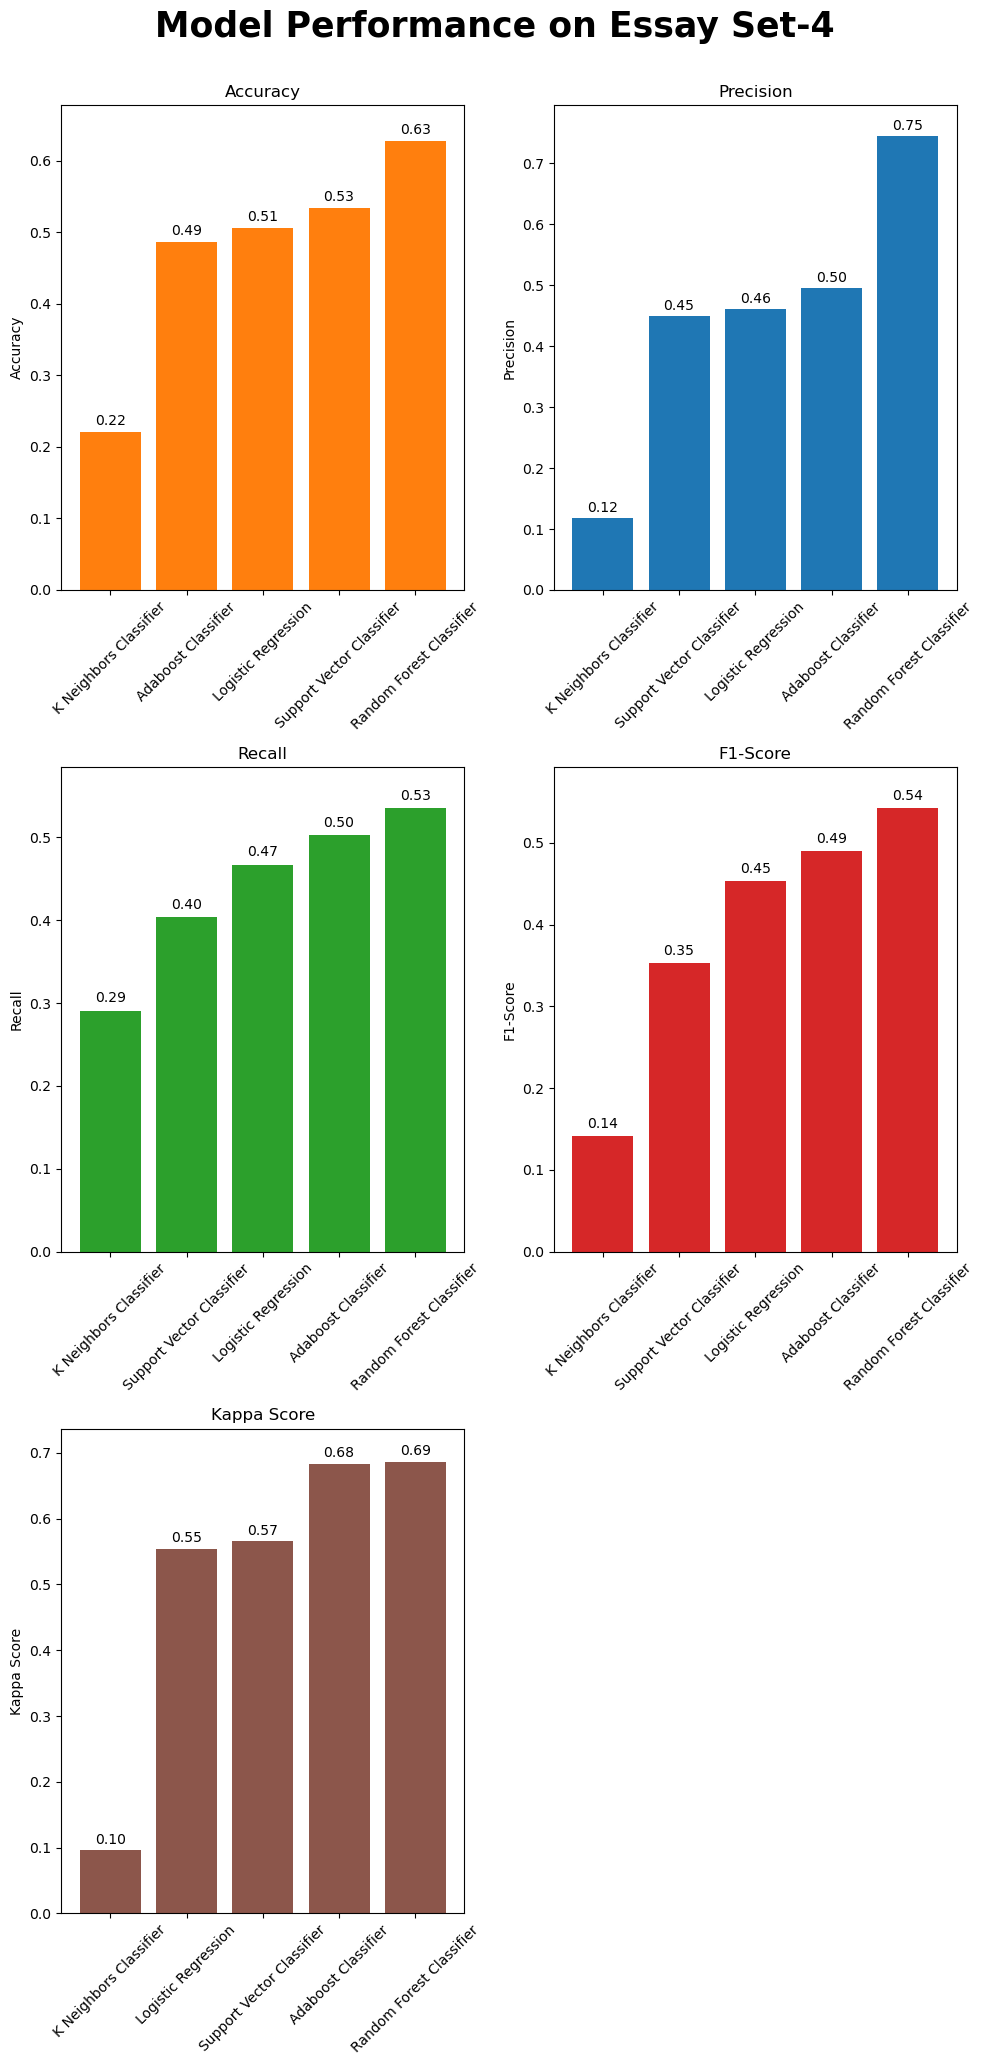

In [320]:
# Define the classifier names
classifier_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier",
                    "K Neighbors Classifier", "Support Vector Classifier"]

# Define the metric names
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

# Define the metric values for each classifier
accuracy_values = [accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc]
precision_values = [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc]
recall_values = [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc]
f1_values = [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc]
kappa_score_values = [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                      kappa_score_k_neighbors, kappa_score_svc]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#8c564b"]

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Plot each metric for all classifiers
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding classifier names
    if metric_name == "Accuracy":
        metric_values = accuracy_values
    elif metric_name == "Precision":
        metric_values = precision_values
    elif metric_name == "Recall":
        metric_values = recall_values
    elif metric_name == "F1-Score":
        metric_values = f1_values
    elif metric_name == "Kappa Score":
        metric_values = kappa_score_values
    sorted_indices = np.argsort(metric_values)
    sorted_values = [metric_values[j] for j in sorted_indices]
    sorted_labels = [classifier_names[j] for j in sorted_indices]

    # Get the subplot corresponding to the current metric
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Create a bar chart for the metric
    ax.bar(sorted_labels, sorted_values, color=colors[i])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, max(sorted_values) + 0.05])
    ax.tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for x, y in zip(sorted_labels, sorted_values):
        ax.text(x, y + 0.01, '{:.2f}'.format(y), ha='center', fontsize=10)

# Hide the last axis
axes[2, 1].axis('off')

# Adjust the spacing between subplots and display the plot
plt.tight_layout()

plt.suptitle("Model Performance on Essay Set-4", fontweight='bold', fontsize=25, y=1.03)
plt.show()

In [321]:
# Define the metric names and their corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]
metrics_list = [[accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc],
               [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc],
               [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc],
               [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc],
               [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                kappa_score_k_neighbors, kappa_score_svc]]

# Define the ML model names
model_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
               "K Neighbors Classifier", "Support Vector Classifier"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())

+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|    Logistic Regression    |  0.506   |   0.461   | 0.467  |  0.453   |    0.555    |
|  Random Forest Classifier |  0.627   |   0.745   | 0.535  |  0.543   |    0.687    |
|    Adaboost Classifier    |  0.486   |   0.495   | 0.502  |  0.490   |    0.684    |
|   K Neighbors Classifier  |  0.220   |   0.119   | 0.291  |  0.141   |    0.096    |
| Support Vector Classifier |  0.534   |   0.450   | 0.404  |  0.353   |    0.565    |
+---------------------------+----------+-----------+--------+----------+-------------+


### Model with Metrics (Essay Set-5)

In [322]:
X_train_final, X_test_final = feature_engineering(X_train_set5, X_test_set5)

In [323]:
print("-----------------------Logistic Regression-----------------------")
model = choose_classifiers("logistic_regression")
model.fit(X_train_final, y_train_set5)
y_predictions = model.predict(X_test_final)
accuracy_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_logistic_reg, kappa_score_logistic_reg = print_metrics_function(y_test_set5, y_predictions)

print("\n")
print("-----------------------Random Forest Classifier-----------------------")
model = choose_classifiers("random_forest_classifier")
model.fit(X_train_final, y_train_set5)
y_predictions = model.predict(X_test_final)
accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest, kappa_score_random_forest = print_metrics_function(y_test_set5, y_predictions)

print("\n")
print("-----------------------Adaboost Classifier-----------------------")
model = choose_classifiers("adaboost_classifier")
model.fit(X_train_final, y_train_set5)
y_predictions = model.predict(X_test_final)
accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost, kappa_score_adaboost = print_metrics_function(y_test_set5, y_predictions)

print("\n")
print("-----------------------K Neibhors Classifier-----------------------")
model = choose_classifiers("k_neighbors_classifier")
model.fit(X_train_final, y_train_set5)
y_predictions = model.predict(X_test_final)
accuracy_k_neighbors, precision_k_neighbors, recall_k_neighbors, f1_k_neighbors, kappa_score_k_neighbors = print_metrics_function(y_test_set5, y_predictions)

print("\n")
print("-----------------------Support Vector Classifier-----------------------")
model = choose_classifiers("support_vector_classifier")
model.fit(X_train_final, y_train_set5)
y_predictions = model.predict(X_test_final)
accuracy_svc, precision_svc, recall_svc, f1_svc, kappa_score_svc = print_metrics_function(y_test_set5, y_predictions)


-----------------------Logistic Regression-----------------------
Accuracy: 0.5761772853185596
Precision: 0.4632345411282793
Recall: 0.4545567589875611
F1-Score: 0.4551194539719436
Cohen Kappa Score: 0.6517044932463475


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6343490304709142
Precision: 0.5511793523449965
Recall: 0.44899525271205504
F1-Score: 0.4629351526273762
Cohen Kappa Score: 0.7409462756542123


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.5484764542936288
Precision: 0.41982332001355466
Recall: 0.45375017645136423
F1-Score: 0.4308836970469838
Cohen Kappa Score: 0.7366630797938152


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.18282548476454294
Precision: 0.13057413600891862
Recall: 0.21109861267341584
F1-Score: 0.08064227128729104
Cohen Kappa Score: 0.0928666500899531


-----------------------Support Vector Classifier-----------------------
Accuracy: 0.5152354570637119
P

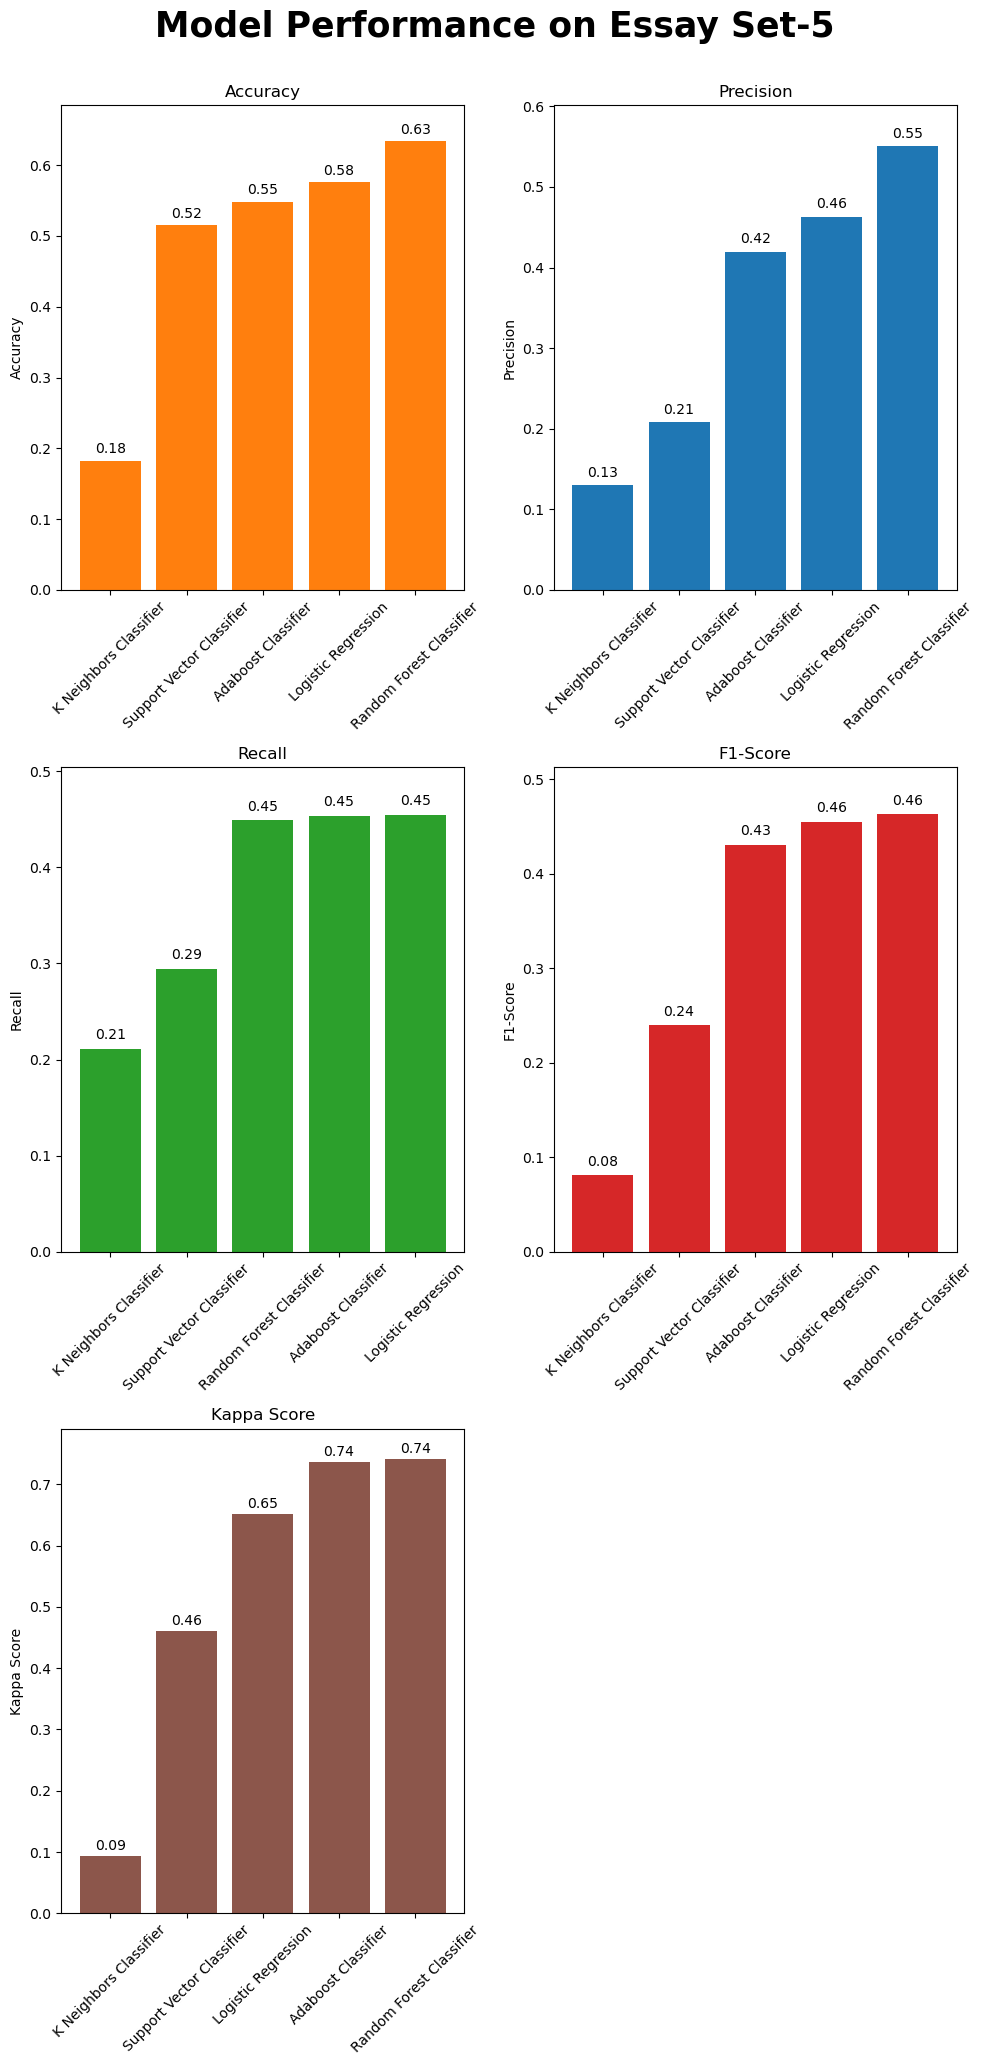

In [324]:
# Define the classifier names
classifier_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier",
                    "K Neighbors Classifier", "Support Vector Classifier"]

# Define the metric names
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

# Define the metric values for each classifier
accuracy_values = [accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc]
precision_values = [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc]
recall_values = [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc]
f1_values = [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc]
kappa_score_values = [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                      kappa_score_k_neighbors, kappa_score_svc]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#8c564b"]

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Plot each metric for all classifiers
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding classifier names
    if metric_name == "Accuracy":
        metric_values = accuracy_values
    elif metric_name == "Precision":
        metric_values = precision_values
    elif metric_name == "Recall":
        metric_values = recall_values
    elif metric_name == "F1-Score":
        metric_values = f1_values
    elif metric_name == "Kappa Score":
        metric_values = kappa_score_values
    sorted_indices = np.argsort(metric_values)
    sorted_values = [metric_values[j] for j in sorted_indices]
    sorted_labels = [classifier_names[j] for j in sorted_indices]

    # Get the subplot corresponding to the current metric
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Create a bar chart for the metric
    ax.bar(sorted_labels, sorted_values, color=colors[i])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, max(sorted_values) + 0.05])
    ax.tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for x, y in zip(sorted_labels, sorted_values):
        ax.text(x, y + 0.01, '{:.2f}'.format(y), ha='center', fontsize=10)

# Hide the last axis
axes[2, 1].axis('off')

# Adjust the spacing between subplots and display the plot
plt.tight_layout()

plt.suptitle("Model Performance on Essay Set-5", fontweight='bold', fontsize=25, y=1.03)
plt.show()

In [325]:
# Define the metric names and their corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]
metrics_list = [[accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc],
               [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc],
               [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc],
               [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc],
               [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                kappa_score_k_neighbors, kappa_score_svc]]

# Define the ML model names
model_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
               "K Neighbors Classifier", "Support Vector Classifier"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())

+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|    Logistic Regression    |  0.576   |   0.463   | 0.455  |  0.455   |    0.652    |
|  Random Forest Classifier |  0.634   |   0.551   | 0.449  |  0.463   |    0.741    |
|    Adaboost Classifier    |  0.548   |   0.420   | 0.454  |  0.431   |    0.737    |
|   K Neighbors Classifier  |  0.183   |   0.131   | 0.211  |  0.081   |    0.093    |
| Support Vector Classifier |  0.515   |   0.208   | 0.294  |  0.240   |    0.460    |
+---------------------------+----------+-----------+--------+----------+-------------+


### Model with Metrics (Essay Set-6)

In [326]:
X_train_final, X_test_final = feature_engineering(X_train_set6, X_test_set6)

In [327]:
print("-----------------------Logistic Regression-----------------------")
model = choose_classifiers("logistic_regression")
model.fit(X_train_final, y_train_set6)
y_predictions = model.predict(X_test_final)
accuracy_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_logistic_reg, kappa_score_logistic_reg = print_metrics_function(y_test_set6, y_predictions)

print("\n")
print("-----------------------Random Forest Classifier-----------------------")
model = choose_classifiers("random_forest_classifier")
model.fit(X_train_final, y_train_set6)
y_predictions = model.predict(X_test_final)
accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest, kappa_score_random_forest = print_metrics_function(y_test_set6, y_predictions)

print("\n")
print("-----------------------Adaboost Classifier-----------------------")
model = choose_classifiers("adaboost_classifier")
model.fit(X_train_final, y_train_set6)
y_predictions = model.predict(X_test_final)
accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost, kappa_score_adaboost = print_metrics_function(y_test_set6, y_predictions)

print("\n")
print("-----------------------K Neibhors Classifier-----------------------")
model = choose_classifiers("k_neighbors_classifier")
model.fit(X_train_final, y_train_set6)
y_predictions = model.predict(X_test_final)
accuracy_k_neighbors, precision_k_neighbors, recall_k_neighbors, f1_k_neighbors, kappa_score_k_neighbors = print_metrics_function(y_test_set6, y_predictions)

print("\n")
print("-----------------------Support Vector Classifier-----------------------")
model = choose_classifiers("support_vector_classifier")
model.fit(X_train_final, y_train_set6)
y_predictions = model.predict(X_test_final)
accuracy_svc, precision_svc, recall_svc, f1_svc, kappa_score_svc = print_metrics_function(y_test_set6, y_predictions)


-----------------------Logistic Regression-----------------------
Accuracy: 0.5527777777777778
Precision: 0.4900471823845104
Recall: 0.44318494607511943
F1-Score: 0.45910256410256406
Cohen Kappa Score: 0.6522811344019728


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.6222222222222222
Precision: 0.591114934074616
Recall: 0.4563541275680004
F1-Score: 0.4769655635640291
Cohen Kappa Score: 0.7148448420464075


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.46944444444444444
Precision: 0.4859195057827816
Recall: 0.4014504666816805
F1-Score: 0.39896923021482833
Cohen Kappa Score: 0.5635430038510911


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.16111111111111112
Precision: 0.16096978527917755
Recall: 0.22019930936115908
F1-Score: 0.12467026222707642
Cohen Kappa Score: 0.26764598317688637


-----------------------Support Vector Classifier-----------------------
Accuracy: 0.5222222222222223


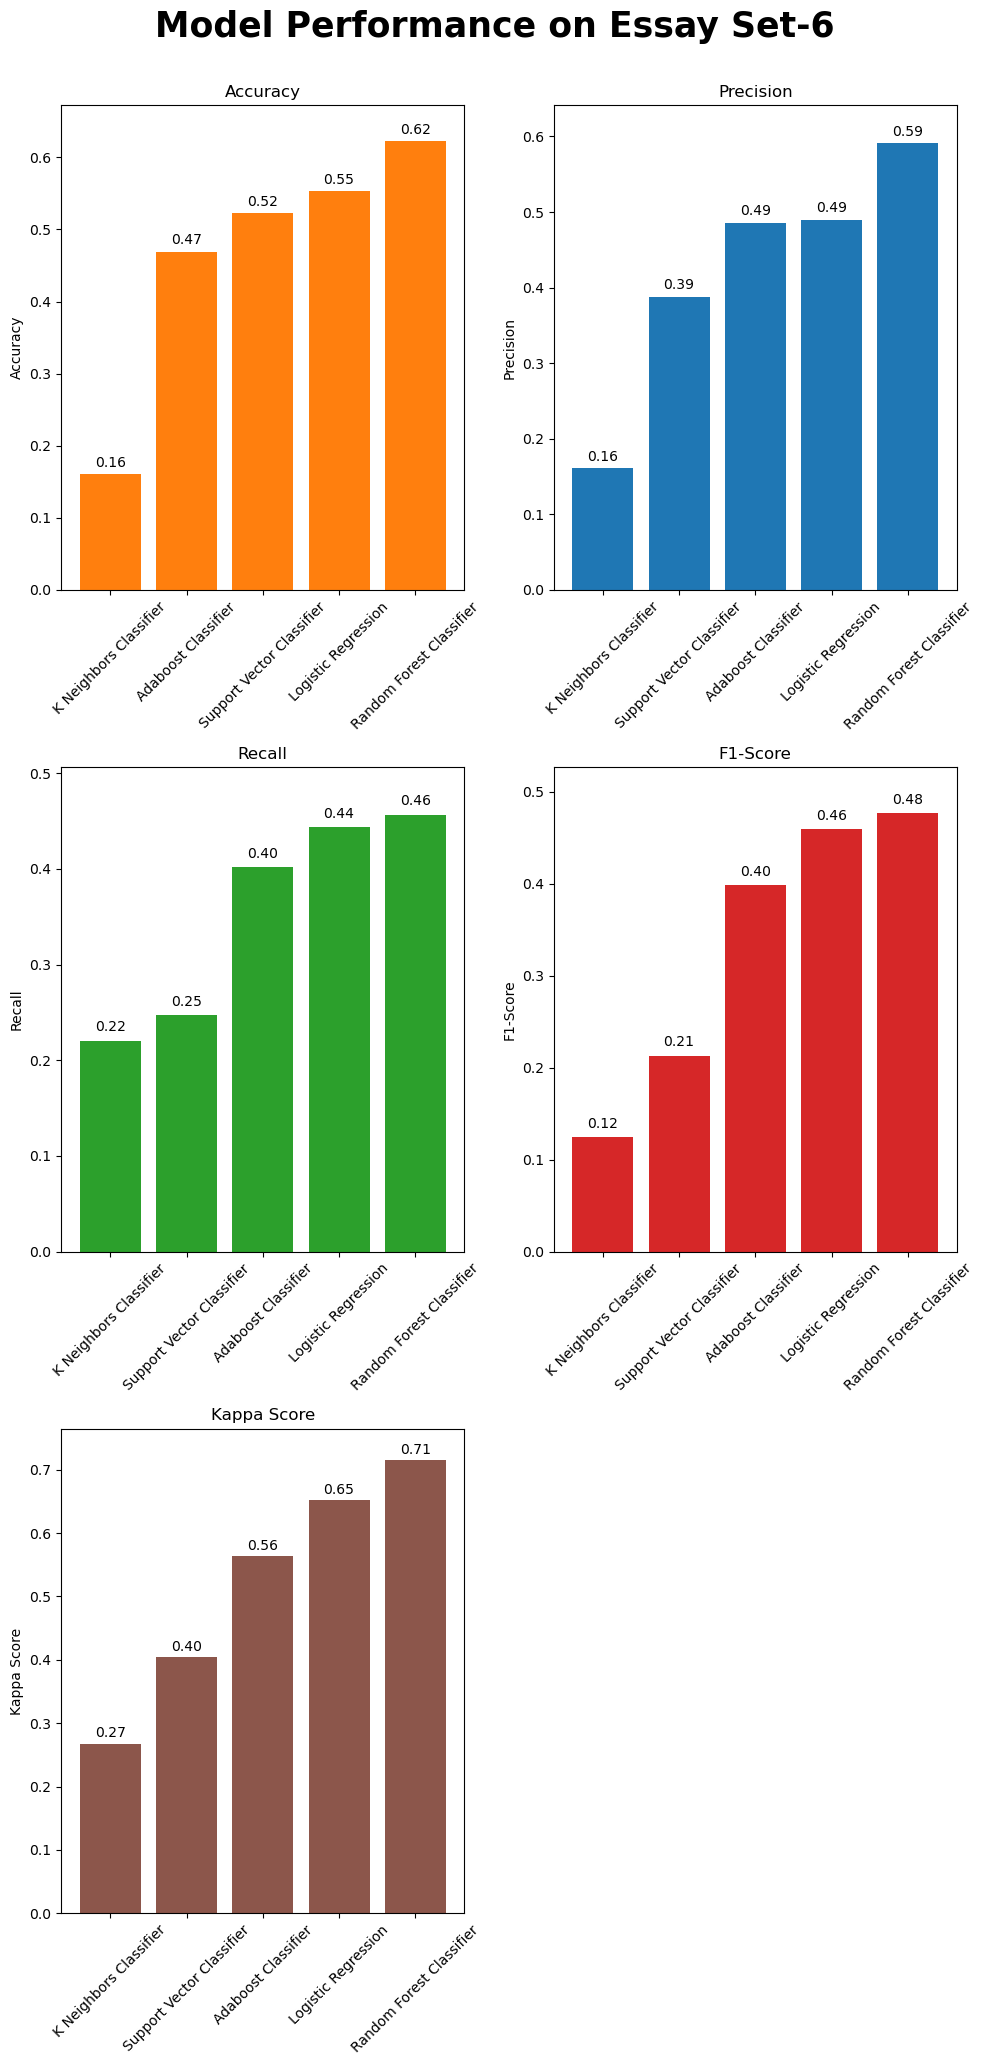

In [328]:
# Define the classifier names
classifier_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier",
                    "K Neighbors Classifier", "Support Vector Classifier"]

# Define the metric names
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

# Define the metric values for each classifier
accuracy_values = [accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc]
precision_values = [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc]
recall_values = [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc]
f1_values = [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc]
kappa_score_values = [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                      kappa_score_k_neighbors, kappa_score_svc]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#8c564b"]

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Plot each metric for all classifiers
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding classifier names
    if metric_name == "Accuracy":
        metric_values = accuracy_values
    elif metric_name == "Precision":
        metric_values = precision_values
    elif metric_name == "Recall":
        metric_values = recall_values
    elif metric_name == "F1-Score":
        metric_values = f1_values
    elif metric_name == "Kappa Score":
        metric_values = kappa_score_values
    sorted_indices = np.argsort(metric_values)
    sorted_values = [metric_values[j] for j in sorted_indices]
    sorted_labels = [classifier_names[j] for j in sorted_indices]

    # Get the subplot corresponding to the current metric
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Create a bar chart for the metric
    ax.bar(sorted_labels, sorted_values, color=colors[i])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, max(sorted_values) + 0.05])
    ax.tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for x, y in zip(sorted_labels, sorted_values):
        ax.text(x, y + 0.01, '{:.2f}'.format(y), ha='center', fontsize=10)

# Hide the last axis
axes[2, 1].axis('off')

# Adjust the spacing between subplots and display the plot
plt.tight_layout()

plt.suptitle("Model Performance on Essay Set-6", fontweight='bold', fontsize=25, y=1.03)
plt.show()

In [329]:
# Define the metric names and their corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]
metrics_list = [[accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc],
               [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc],
               [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc],
               [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc],
               [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                kappa_score_k_neighbors, kappa_score_svc]]

# Define the ML model names
model_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
               "K Neighbors Classifier", "Support Vector Classifier"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())

+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|    Logistic Regression    |  0.553   |   0.490   | 0.443  |  0.459   |    0.652    |
|  Random Forest Classifier |  0.622   |   0.591   | 0.456  |  0.477   |    0.715    |
|    Adaboost Classifier    |  0.469   |   0.486   | 0.401  |  0.399   |    0.564    |
|   K Neighbors Classifier  |  0.161   |   0.161   | 0.220  |  0.125   |    0.268    |
| Support Vector Classifier |  0.522   |   0.388   | 0.247  |  0.213   |    0.404    |
+---------------------------+----------+-----------+--------+----------+-------------+


### Model with Metrics (Essay Set-7)

In [330]:
X_train_final, X_test_final = feature_engineering(X_train_set7, X_test_set7)

In [331]:
print("-----------------------Logistic Regression-----------------------")
model = choose_classifiers("logistic_regression")
model.fit(X_train_final, y_train_set7)
y_predictions = model.predict(X_test_final)
accuracy_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_logistic_reg, kappa_score_logistic_reg = print_metrics_function(y_test_set7, y_predictions)

print("\n")
print("-----------------------Random Forest Classifier-----------------------")
model = choose_classifiers("random_forest_classifier")
model.fit(X_train_final, y_train_set7)
y_predictions = model.predict(X_test_final)
accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest, kappa_score_random_forest = print_metrics_function(y_test_set7, y_predictions)

print("\n")
print("-----------------------Adaboost Classifier-----------------------")
model = choose_classifiers("adaboost_classifier")
model.fit(X_train_final, y_train_set7)
y_predictions = model.predict(X_test_final)
accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost, kappa_score_adaboost = print_metrics_function(y_test_set7, y_predictions)

print("\n")
print("-----------------------K Neibhors Classifier-----------------------")
model = choose_classifiers("k_neighbors_classifier")
model.fit(X_train_final, y_train_set7)
y_predictions = model.predict(X_test_final)
accuracy_k_neighbors, precision_k_neighbors, recall_k_neighbors, f1_k_neighbors, kappa_score_k_neighbors = print_metrics_function(y_test_set7, y_predictions)

print("\n")
print("-----------------------Support Vector Classifier-----------------------")
model = choose_classifiers("support_vector_classifier")
model.fit(X_train_final, y_train_set7)
y_predictions = model.predict(X_test_final)
accuracy_svc, precision_svc, recall_svc, f1_svc, kappa_score_svc = print_metrics_function(y_test_set7, y_predictions)


-----------------------Logistic Regression-----------------------
Accuracy: 0.1178343949044586
Precision: 0.07576608001249151
Recall: 0.08211550799924956
F1-Score: 0.06851428110623024
Cohen Kappa Score: 0.41044664315819646


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.15286624203821655
Precision: 0.11493570105443146
Recall: 0.10248298019868858
F1-Score: 0.08085630076686688
Cohen Kappa Score: 0.6060598371001138


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.09872611464968153
Precision: 0.009336377037861776
Recall: 0.0636530474258669
F1-Score: 0.016283089812501577
Cohen Kappa Score: 0.3721878764051808


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.0031847133757961785
Precision: 0.00048355899419729207
Recall: 0.022727272727272728
F1-Score: 0.0009469696969696971
Cohen Kappa Score: -0.028502175048106704


-----------------------Support Vector Classifier-----------------------
Accuracy:

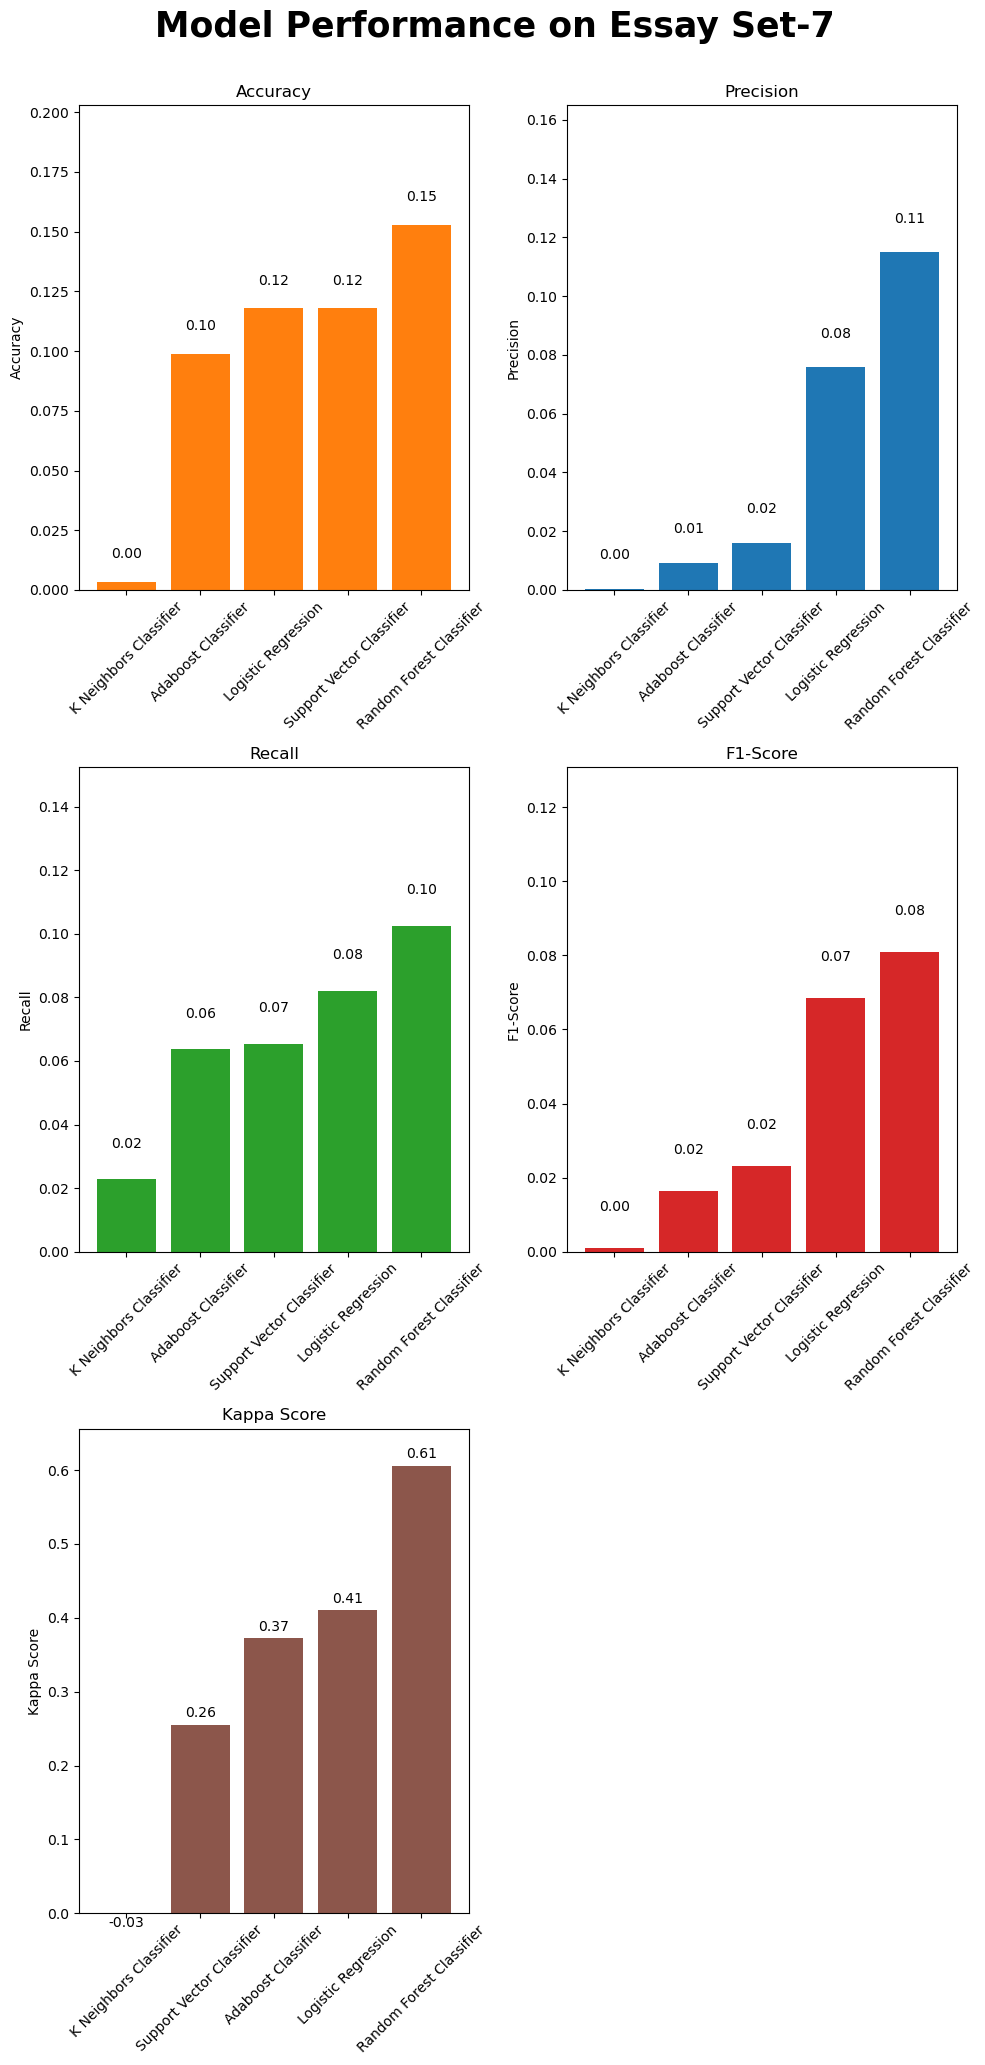

In [332]:
# Define the classifier names
classifier_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier",
                    "K Neighbors Classifier", "Support Vector Classifier"]

# Define the metric names
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

# Define the metric values for each classifier
accuracy_values = [accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc]
precision_values = [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc]
recall_values = [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc]
f1_values = [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc]
kappa_score_values = [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                      kappa_score_k_neighbors, kappa_score_svc]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#8c564b"]

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Plot each metric for all classifiers
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding classifier names
    if metric_name == "Accuracy":
        metric_values = accuracy_values
    elif metric_name == "Precision":
        metric_values = precision_values
    elif metric_name == "Recall":
        metric_values = recall_values
    elif metric_name == "F1-Score":
        metric_values = f1_values
    elif metric_name == "Kappa Score":
        metric_values = kappa_score_values
    sorted_indices = np.argsort(metric_values)
    sorted_values = [metric_values[j] for j in sorted_indices]
    sorted_labels = [classifier_names[j] for j in sorted_indices]

    # Get the subplot corresponding to the current metric
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Create a bar chart for the metric
    ax.bar(sorted_labels, sorted_values, color=colors[i])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, max(sorted_values) + 0.05])
    ax.tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for x, y in zip(sorted_labels, sorted_values):
        ax.text(x, y + 0.01, '{:.2f}'.format(y), ha='center', fontsize=10)

# Hide the last axis
axes[2, 1].axis('off')

# Adjust the spacing between subplots and display the plot
plt.tight_layout()

plt.suptitle("Model Performance on Essay Set-7", fontweight='bold', fontsize=25, y=1.03)
plt.show()

In [333]:
# Define the metric names and their corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]
metrics_list = [[accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc],
               [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc],
               [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc],
               [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc],
               [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                kappa_score_k_neighbors, kappa_score_svc]]

# Define the ML model names
model_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
               "K Neighbors Classifier", "Support Vector Classifier"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())

+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|    Logistic Regression    |  0.118   |   0.076   | 0.082  |  0.069   |    0.410    |
|  Random Forest Classifier |  0.153   |   0.115   | 0.102  |  0.081   |    0.606    |
|    Adaboost Classifier    |  0.099   |   0.009   | 0.064  |  0.016   |    0.372    |
|   K Neighbors Classifier  |  0.003   |   0.000   | 0.023  |  0.001   |    -0.029   |
| Support Vector Classifier |  0.118   |   0.016   | 0.065  |  0.023   |    0.255    |
+---------------------------+----------+-----------+--------+----------+-------------+


### Model with Metrics (Essay Set-8)

In [334]:
X_train_final, X_test_final = feature_engineering(X_train_set8, X_test_set8)

In [335]:
print("-----------------------Logistic Regression-----------------------")
model = choose_classifiers("logistic_regression")
model.fit(X_train_final, y_train_set8)
y_predictions = model.predict(X_test_final)
accuracy_logistic_reg, precision_logistic_reg, recall_logistic_reg, f1_logistic_reg, kappa_score_logistic_reg = print_metrics_function(y_test_set8, y_predictions)

print("\n")
print("-----------------------Random Forest Classifier-----------------------")
model = choose_classifiers("random_forest_classifier")
model.fit(X_train_final, y_train_set8)
y_predictions = model.predict(X_test_final)
accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest, kappa_score_random_forest = print_metrics_function(y_test_set8, y_predictions)

print("\n")
print("-----------------------Adaboost Classifier-----------------------")
model = choose_classifiers("adaboost_classifier")
model.fit(X_train_final, y_train_set8)
y_predictions = model.predict(X_test_final)
accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost, kappa_score_adaboost = print_metrics_function(y_test_set8, y_predictions)

print("\n")
print("-----------------------K Neibhors Classifier-----------------------")
model = choose_classifiers("k_neighbors_classifier")
model.fit(X_train_final, y_train_set8)
y_predictions = model.predict(X_test_final)
accuracy_k_neighbors, precision_k_neighbors, recall_k_neighbors, f1_k_neighbors, kappa_score_k_neighbors = print_metrics_function(y_test_set8, y_predictions)

print("\n")
print("-----------------------Support Vector Classifier-----------------------")
model = choose_classifiers("support_vector_classifier")
model.fit(X_train_final, y_train_set8)
y_predictions = model.predict(X_test_final)
accuracy_svc, precision_svc, recall_svc, f1_svc, kappa_score_svc = print_metrics_function(y_test_set8, y_predictions)


-----------------------Logistic Regression-----------------------
Accuracy: 0.20689655172413793
Precision: 0.021583652618135378
Recall: 0.040477606024573926
F1-Score: 0.02323159962223642
Cohen Kappa Score: 0.46319328022318385


-----------------------Random Forest Classifier-----------------------
Accuracy: 0.2206896551724138
Precision: 0.015109261800421997
Recall: 0.04478795085216013
F1-Score: 0.02160295064691763
Cohen Kappa Score: 0.4874278255456923


-----------------------Adaboost Classifier-----------------------
Accuracy: 0.21379310344827587
Precision: 0.013543599257884972
Recall: 0.04690065681444992
F1-Score: 0.02095952417397389
Cohen Kappa Score: 0.5182635829662261


-----------------------K Neibhors Classifier-----------------------
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Cohen Kappa Score: 0.0023014656471114225


-----------------------Support Vector Classifier-----------------------
Accuracy: 0.2
Precision: 0.0071428571428571435
Recall: 0.03571428571428571
F1-

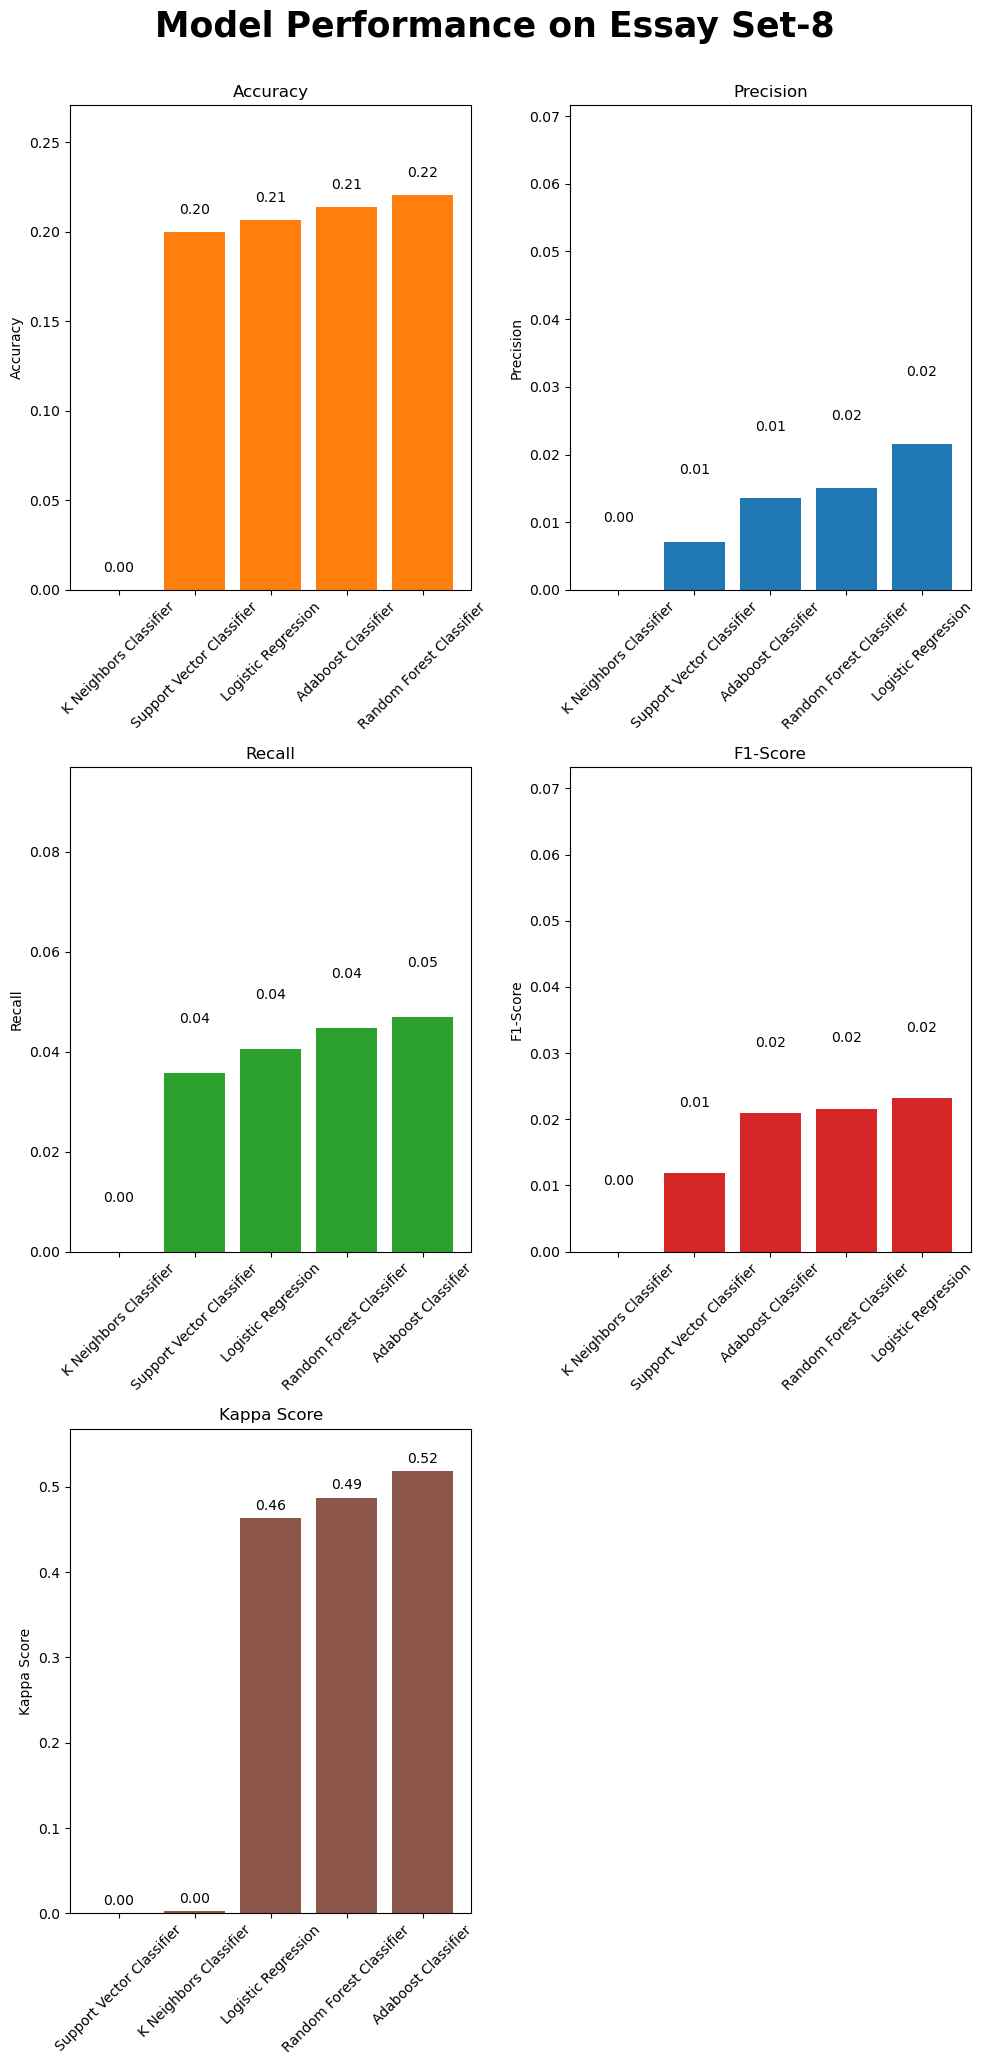

In [336]:
# Define the classifier names
classifier_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier",
                    "K Neighbors Classifier", "Support Vector Classifier"]

# Define the metric names
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]

# Define the metric values for each classifier
accuracy_values = [accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc]
precision_values = [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc]
recall_values = [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc]
f1_values = [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc]
kappa_score_values = [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                      kappa_score_k_neighbors, kappa_score_svc]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#8c564b"]

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

# Plot each metric for all classifiers
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding classifier names
    if metric_name == "Accuracy":
        metric_values = accuracy_values
    elif metric_name == "Precision":
        metric_values = precision_values
    elif metric_name == "Recall":
        metric_values = recall_values
    elif metric_name == "F1-Score":
        metric_values = f1_values
    elif metric_name == "Kappa Score":
        metric_values = kappa_score_values
    sorted_indices = np.argsort(metric_values)
    sorted_values = [metric_values[j] for j in sorted_indices]
    sorted_labels = [classifier_names[j] for j in sorted_indices]

    # Get the subplot corresponding to the current metric
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Create a bar chart for the metric
    ax.bar(sorted_labels, sorted_values, color=colors[i])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim([0, max(sorted_values) + 0.05])
    ax.tick_params(axis='x', rotation=45)

    # Add labels to the bars
    for x, y in zip(sorted_labels, sorted_values):
        ax.text(x, y + 0.01, '{:.2f}'.format(y), ha='center', fontsize=10)

# Hide the last axis
axes[2, 1].axis('off')

# Adjust the spacing between subplots and display the plot
plt.tight_layout()

plt.suptitle("Model Performance on Essay Set-8", fontweight='bold', fontsize=25, y=1.03)
plt.show()

In [337]:
# Define the metric names and their corresponding values
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa Score"]
metrics_list = [[accuracy_logistic_reg, accuracy_random_forest, accuracy_adaboost, accuracy_k_neighbors, accuracy_svc],
               [precision_logistic_reg, precision_random_forest, precision_adaboost, precision_k_neighbors, precision_svc],
               [recall_logistic_reg, recall_random_forest, recall_adaboost, recall_k_neighbors, recall_svc],
               [f1_logistic_reg, f1_random_forest, f1_adaboost, f1_k_neighbors, f1_svc],
               [kappa_score_logistic_reg, kappa_score_random_forest, kappa_score_adaboost,
                kappa_score_k_neighbors, kappa_score_svc]]

# Define the ML model names
model_names = ["Logistic Regression", "Random Forest Classifier", "Adaboost Classifier", 
               "K Neighbors Classifier", "Support Vector Classifier"]

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]

        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        row.append(value_formatted)

    table.add_row(row)

# Print the formatted table
print(table.get_string())

+---------------------------+----------+-----------+--------+----------+-------------+
|           Model           | Accuracy | Precision | Recall | F1-Score | Kappa Score |
+---------------------------+----------+-----------+--------+----------+-------------+
|    Logistic Regression    |  0.207   |   0.022   | 0.040  |  0.023   |    0.463    |
|  Random Forest Classifier |  0.221   |   0.015   | 0.045  |  0.022   |    0.487    |
|    Adaboost Classifier    |  0.214   |   0.014   | 0.047  |  0.021   |    0.518    |
|   K Neighbors Classifier  |  0.000   |   0.000   | 0.000  |  0.000   |    0.002    |
| Support Vector Classifier |  0.200   |   0.007   | 0.036  |  0.012   |    0.000    |
+---------------------------+----------+-----------+--------+----------+-------------+
